In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from scipy.stats import ttest_ind


# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression


# Import API key. Renamed mine
#from api_keys_Yvonne import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

# Our Clean Netflix data (CSV)
output_data_file = "NetflixDF4.csv"

# Read the CSV
netflix_df = pd.read_csv(output_data_file)

# Display the data table for preview
netflix_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
0,s1,Dick Johnson Is Dead,2020,Movie,PG-13,United States,Documentaries,90.0
1,s8,Sankofa,1993,Movie,R,United States,Dramas,125.0
2,s10,The Starling,2021,Movie,PG-13,United States,Comedies,104.0
3,s25,Jeans,1998,Movie,PG-13,India,Comedies,166.0
4,s28,Grown Ups,2010,Movie,PG-13,United States,Comedies,103.0


In [2]:
netflix_df.rating.value_counts()

R        1604
PG-13    1207
PG        614
G          86
NR         47
Name: rating, dtype: int64

In [3]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3558 entries, 0 to 3557
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3558 non-null   object 
 1   title         3558 non-null   object 
 2   release_year  3558 non-null   int64  
 3   type          3558 non-null   object 
 4   rating        3558 non-null   object 
 5   country       3558 non-null   object 
 6   genre         3558 non-null   object 
 7   duration      3558 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 222.5+ KB


In [4]:
#using hmk 5
corrs=netflix_df.corr()
corrs

,release_year,duration
release_year,1.000000,-0.239211
duration,-0.239211,1.000000


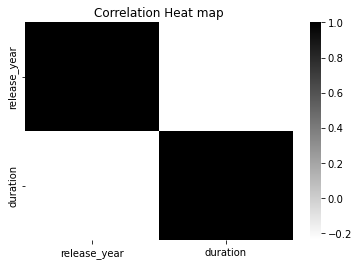

In [5]:
sns.heatmap(corrs, cmap = "binary")
plt.title("Correlation Heat map")
plt.show()

In [6]:
# ValueError: '#0A0903' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
#https://gallantlab.github.io/pycortex/colormaps.html

In [7]:
corr=(st.pearsonr(netflix_df['release_year'],netflix_df['duration']))
corr
print(f"The correlation between release year and duration is {corr}")

The correlation between release year and duration is (-0.23921099735861706, 1.7608552288147146e-47)


The r-squared is: 0.05722190125730432


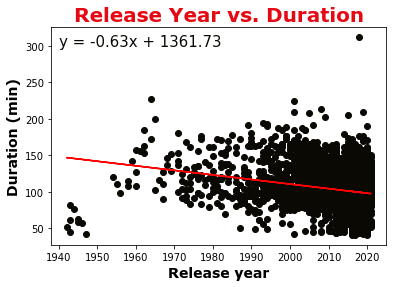

In [35]:
#linear regression model like in class activity day 3 act 9

x_values = netflix_df['release_year']
y_values = netflix_df['duration']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color="#0A0903",marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1940,300),fontsize=15,color="#0A0903")
plt.xlabel('Release year',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel('Duration (min)',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title('Release Year vs. Duration',fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [9]:
feature = netflix_df[["release_year"]]
target = netflix_df["duration"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\yvonne\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     215.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.76e-47
Time:                        17:52:49   Log-Likelihood:                -16657.
No. Observations:                3558   AIC:                         3.332e+04
Df Residuals:                    3556   BIC:                         3.333e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1361.7262     85.661     15.897      0.000    1193.776    1529.676
release_year    -0.6255      0.043    -14.691      0.000      -0.709      -0.542
==============================================================================
Omnibus:                      264.628   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.753
Skew:                           0.457   Prob(JB):                    7.19e-135
Kurtosis:                       4.825   Cond. No.                     3.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# both my r2 are the same and my coeficcients

In [11]:
#SCIKIT_Learn
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[-0.62549946]
1361.7262379547915


In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [13]:
actual = netflix_df["duration"]
predictions = reg.predict(netflix_df["release_year"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.05722190125730431
MSE: 682.0570207305993
RMSE: 26.11622140989388
MAE: 19.939535600284756


#booth
#5.7% of the variance of duration is explained by releas year

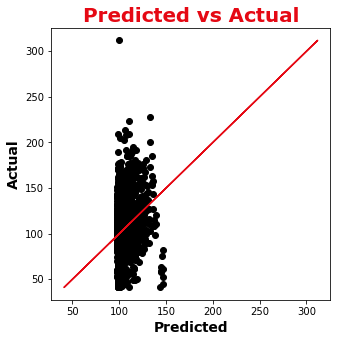

In [34]:
#questions about this one
plt.figure(figsize=(5,5))

plt.scatter(predictions, actual, c="black")
plt.plot(actual, actual,color="#E50914", )

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Actual",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("Predicted vs Actual", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")

plt.show()

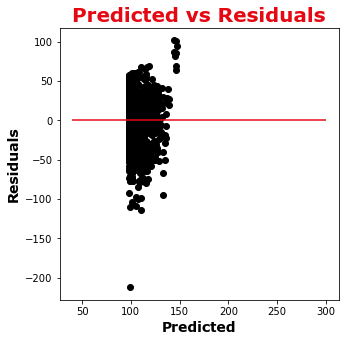

In [37]:
residuals = predictions - actual

plt.figure(figsize=(5,5))

plt.scatter(predictions, residuals,c="black")
plt.hlines(0,40, 300,color="#E50914")

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Residuals",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("Predicted vs Residuals", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")

plt.show()

In [16]:
netflix_df.describe()

,release_year,duration
count,3558.000000,3558.000000
mean,2011.912591,103.275998
std,10.287760,26.900889
min,1942.000000,41.000000
25%,2010.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,119.000000
max,2021.000000,312.000000


T test

In [17]:
us_df = netflix_df.loc[(netflix_df['country'] == 'United States')]
us_df.head()


,show_id,title,release_year,type,rating,country,genre,duration
0,s1,Dick Johnson Is Dead,2020,Movie,PG-13,United States,Documentaries,90.0
1,s8,Sankofa,1993,Movie,R,United States,Dramas,125.0
2,s10,The Starling,2021,Movie,PG-13,United States,Comedies,104.0
4,s28,Grown Ups,2010,Movie,PG-13,United States,Comedies,103.0
5,s29,Dark Skies,2013,Movie,PG-13,United States,Horror Movies,97.0


In [18]:
india_df = netflix_df.loc[(netflix_df['country'] == 'India')]
india_df.head()


,show_id,title,release_year,type,rating,country,genre,duration
3,s25,Jeans,1998,Movie,PG-13,India,Comedies,166.0
16,s106,Angamaly Diaries,2017,Movie,PG-13,India,Action & Adventure,128.0
18,s115,Anjaam,1994,Movie,PG-13,India,Dramas,143.0
20,s117,Dhanak,2015,Movie,PG,India,Comedies,114.0
22,s119,Gurgaon,2017,Movie,PG-13,India,Dramas,106.0


In [19]:
uk_df = netflix_df.loc[(netflix_df['country'] == 'United Kingdom')]
uk_df.head()


,show_id,title,release_year,type,rating,country,genre,duration
13,s95,Show Dogs,2018,Movie,PG,United Kingdom,Children & Family Movies,90.0
19,s116,Bright Star,2009,Movie,PG,United Kingdom,Dramas,119.0
21,s118,Final Account,2021,Movie,PG-13,United Kingdom,Documentaries,94.0
23,s123,In the Cut,2003,Movie,R,United Kingdom,Thrillers,118.0
40,s156,Labyrinth,1986,Movie,PG,United Kingdom,Action & Adventure,101.0


In [22]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3558 entries, 0 to 3557
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3558 non-null   object 
 1   title         3558 non-null   object 
 2   release_year  3558 non-null   int64  
 3   type          3558 non-null   object 
 4   rating        3558 non-null   object 
 5   country       3558 non-null   object 
 6   genre         3558 non-null   object 
 7   duration      3558 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 222.5+ KB


In [27]:
import scipy.stats as stats

#US and India
stats.ttest_ind(us_df["duration"], india_df["duration"],equal_var=False)

Ttest_indResult(statistic=-33.855830975592724, pvalue=1.064045923452569e-187)

In [28]:
#US and United Kingdom
stats.ttest_ind(us_df["duration"], uk_df["duration"],equal_var=False)

Ttest_indResult(statistic=-2.17608376839767, pvalue=0.030043243636413416)

In [29]:
#India and United kingdom 
stats.ttest_ind(india_df["duration"], uk_df["duration"],equal_var=False)

Ttest_indResult(statistic=19.480342812029978, pvalue=5.013205070128878e-68)

In [ ]:
# P-value < 0.05; therefore, we reject our null and accept our alternative. This is statistically significant. There is a change.

In [ ]:
# P-value > 0.05; therefore, we accept the null hypothesis and reject the alternative hypothesis. It is not a statistically significant change.